In [1]:
# Group no.. 6
# Topic: Amazon Sales analysis
from __future__ import unicode_literals
import pandas as pd
import numpy as np
import os
import seaborn as sns
import string
import matplotlib.pyplot as pplt
import matplotlib
matplotlib.style.use("ggplot")

# import plotly.offline as pyoff
# import plotly.graph_objs as go

from wordcloud import wordcloud
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from apyori import apriori
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# read the data
watches_review = pd.read_csv('watches_review.csv',error_bad_lines = False)

C:\Users\krish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# read the start of review
watches_review.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,US,3653882.0,R3O9SGZBVQBV76,B00FALQ1ZC,937001370.0,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5.0,0.0,0.0,...,Five Stars,Absolutely love this watch! Get compliments al...,31-08-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,14661224.0,RKH8BNC3L5DLF,B00D3RGO20,484010722.0,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5.0,0.0,0.0,...,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,31-08-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,27324930.0,R2HLE8WKZSU3NL,B00DKYC7TK,361166390.0,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2.0,1.0,1.0,...,Two Stars,Scratches,31-08-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,7211452.0,R31U3UH5AZ42LL,B000EQS1JW,958035625.0,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5.0,0.0,0.0,...,Five Stars,"It works well on me. However, I found cheaper ...",31-08-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,12733322.0,R2SV659OUJ945Y,B00A6GFD7S,765328221.0,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4.0,0.0,0.0,...,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,31-08-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# watch the end of the data
watches_review.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
960240,US,39508379.0,REH8UQZAXQS40,B00005OT9I,2153632.0,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2.0,17.0,17.0,...,Great prize - but size??,It's a great watch - but you don't have a chan...,13-12-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960241,US,44704251.0,RJ14QPZEOI9P8,B00005QEM6,903687397.0,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5.0,9.0,10.0,...,A very classy watch!,"Well worth the price. This is a light weight, ...",08-11-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960242,US,40571775.0,R2B1G5650WWFCE,B00005QEME,252821780.0,Men's Timex Internet Messenger Sport Watch,Watches,5.0,3.0,16.0,...,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",06-11-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960243,US,44474855.0,R2MMGPUWXXOFI2,B00004YK0H,118389241.0,Energizer 393 Button Cell Battery,Watches,4.0,0.0,0.0,...,Now watt a minute here.,"In the old days, the common hearing battery in...",05-04-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960244,US,44474855.0,R2BZMVAERMRUDE,B00004YK0H,118389241.0,Energizer 393 Button Cell Battery,Watches,4.0,5.0,7.0,...,1/10 Watt difference for hearing aids,I have found that a #393 watch battery is the ...,05-04-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
watches_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960245 entries, 0 to 960244
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        960237 non-null  object 
 1   customer_id        960237 non-null  float64
 2   review_id          960237 non-null  object 
 3   product_id         960237 non-null  object 
 4   product_parent     960237 non-null  float64
 5   product_title      960235 non-null  object 
 6   product_category   960237 non-null  object 
 7   star_rating        960237 non-null  float64
 8   helpful_votes      960237 non-null  float64
 9   total_votes        960237 non-null  float64
 10  vine               960237 non-null  object 
 11  verified_purchase  960237 non-null  object 
 12  review_headline    960230 non-null  object 
 13  review_body        960089 non-null  object 
 14  review_date        960233 non-null  object 
 15  Unnamed: 15        33 non-null      float64
 16  Un

In [6]:
# get unique products from all the reviews (to get the most reviewed item)
products = watches_review['star_rating'].groupby(watches_review['product_id']).count()
print('Number of unique products (in watches) is {}'.format(products.count()))

Number of unique products (in watches) is 149661


In [7]:
# see top 20 most reviewed products
sorted_products = products.sort_values(ascending=False)

print("Top 20 reviewed products are: \n")
print(sorted_products[:20],end='\n\n')
print('Most Reviewed Product, B000T9VK56 - has {} reviews.'.format(products.max()))
print("Most reviewed product is " + watches_review[watches_review['product_id']=="B000T9VK56"]['product_title'])

Top 20 reviewed products are: 

product_id
B000T9VK56    4390
B004YM2FV2    3050
B005JVP0LE    2047
B002SSUQFG    1945
B008D902Q2    1884
B000AR7S3A    1516
B000JQJS6M    1465
B00791QYMQ    1421
B000EQS1JW    1410
B000GAWSHM    1309
B000GAYQLI    1308
B000GAYQKY    1254
B000LTAY1U    1238
B000GAWSDG    1208
B000JQFX1G    1161
B00791R1MI    1101
B0006AAS7E    1089
B004VR9HP2    1058
B003DZDYMU    1044
B004VR9GCQ    1022
Name: star_rating, dtype: int64

Most Reviewed Product, B000T9VK56 - has 4390 reviews.
650       Most reviewed product is SE JT6216 21-Piece Wa...
663       Most reviewed product is SE JT6216 21-Piece Wa...
945       Most reviewed product is SE JT6216 21-Piece Wa...
1580      Most reviewed product is SE JT6216 21-Piece Wa...
1652      Most reviewed product is SE JT6216 21-Piece Wa...
                                ...                        
931197    Most reviewed product is SE JT6216 21-Piece Wa...
931930    Most reviewed product is SE JT6216 21-Piece Wa...
932011    

In [8]:
# see the least reviewed products
print("Bottom 20 sorted products")
print(sorted_products[149638:],end='\n\n')

Bottom 20 sorted products
product_id
B00DY79HQE    1
B004GL4RBC    1
B004GL4UK0    1
B004GL6PP8    1
B00DYO4SQG    1
B004GIA1BK    1
B00DYQ1ZJC    1
B00DYVH0AK    1
B004GHW6UU    1
B00DYXHBLQ    1
B004GHY39M    1
B004GI09LM    1
B00DYX87LO    1
B004GI32HK    1
B004GI4E2C    1
B004GIA0H0    1
B004GI4J2M    1
B00DYQ5548    1
B00DYQ50JI    1
B004GI5ZFC    1
B004GI60NS    1
B00DYQ508Y    1
1380137136    1
Name: star_rating, dtype: int64



In [9]:
# select verified purchases
verified = watches_review[watches_review['verified_purchase']=='Y']

In [10]:
# select non-verified reviews
not_verified = watches_review[watches_review['verified_purchase'] == 'N']

In [11]:
# see the head and tails of reviews
verified.head()
verified.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
960200,US,52567751.0,R1KB6VKO3O3WFP,B00005OT9I,2153632.0,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2.0,2.0,2.0,...,Not A Good Bargain,"My wrist also isn't very large, but the clasp ...",28-03-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960201,US,40971960.0,R1XLXFPI77W3RK,B00005OT91,458246193.0,Timex Men's T44661 Expedition Metal Tech Watch,Watches,4.0,7.0,7.0,...,Good Watch,I wasn't expecting a ton out of this watch giv...,21-03-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960226,US,48770245.0,R1GI9H9A6NH047,B00005OT8Z,122254165.0,Timex Ironman Triathlon Digital Heart Rate Mon...,Watches,4.0,12.0,16.0,...,the display is the only weakness,It would be nice to be able to &quot;flip&quot...,24-07-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960235,US,43740490.0,R1QR8HYA5KKDUC,B00005RE2T,446758659.0,Kenneth Cole Women's KC4232 Reaction Silver-Wh...,Watches,5.0,9.0,9.0,...,Very nice watch!,This watch looks very hip - very Kenneth Cole....,12-03-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960238,US,52747641.0,RV2ZMW41C90G6,B00005OT9R,470885004.0,Xhilaration Lady Bug Clip Watch,Watches,3.0,4.0,4.0,...,Adorable but fragile,The 13 year old girl I bought this for just lo...,19-01-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
verified.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,Unnamed: 15,Unnamed: 16
count,8.308310e+05,8.308310e+05,830831.000000,830831.000000,830831.000000,25.000000,25.000000
mean,2.578562e+07,5.062023e+08,4.160770,0.975378,1.266001,0.320000,0.360000
std,1.580493e+07,2.862960e+08,1.275976,4.735494,5.223386,0.627163,0.637704
min,1.001600e+04,4.384000e+03,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.263687e+07,2.590942e+08,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.374362e+07,5.169310e+08,5.000000,0.000000,0.000000,0.000000,0.000000
75%,4.078918e+07,7.494350e+08,5.000000,1.000000,1.000000,0.000000,1.000000
max,5.309646e+07,9.999979e+08,5.000000,803.000000,820.000000,2.000000,2.000000


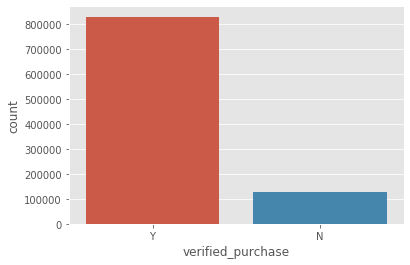

In [13]:
sns.countplot(watches_review['verified_purchase'],label="Verified purchases")

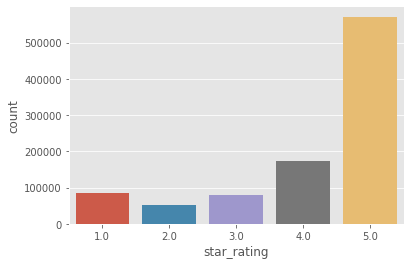

In [14]:
sns.countplot(x='star_rating',data = watches_review)

In [15]:
# read the review comments
words = verified['review_body'].tolist()

In [16]:
len(words)

830831

In [17]:
 # Approach 1: Use of pd.to_datetime function
print(verified['review_date'])
verified['review_date'] = pd.to_datetime(verified['review_date'],format="%d-%m-%Y",exact=True,errors = "coerce",dayfirst=True)
print(verified['review_date'])

#verified['review_date'] = pd.to_datetime(verified.review_date) 
#verified

0         31-08-2015
1         31-08-2015
2         31-08-2015
3         31-08-2015
4         31-08-2015
             ...    
960200    28-03-2003
960201    21-03-2003
960226    24-07-2002
960235    12-03-2002
960238    19-01-2002
Name: review_date, Length: 830831, dtype: object
0        2015-08-31
1        2015-08-31
2        2015-08-31
3        2015-08-31
4        2015-08-31
            ...    
960200   2003-03-28
960201   2003-03-21
960226   2002-07-24
960235   2002-03-12
960238   2002-01-19
Name: review_date, Length: 830831, dtype: datetime64[ns]


C:\Users\krish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
product_2015 = verified[verified['review_date'].dt.year == 2015]['product_id'].groupby(verified['product_id']).count()
# product_2015 = verified[verified['year'] == 2015]['product_id'].groupby(verified['product_id']).count()
sorted_2015 = product_2015.sort_values(ascending=False)
# print(sorted_2015)
print("The most selling product is {}".format(sorted_2015.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B004YM2FV2"]['product_title']))
print("The most grossing product of year 2015 selled {} times".format(product_2015.max()))

The most selling product is product_id
B000T9VK56    1072
B004YM2FV2     752
Name: product_id, dtype: int64
The name of the product is 69        Bling Jewelry Plated Classic Round CZ Ladies W...
566       Bling Jewelry Plated Classic Round CZ Ladies W...
670       Bling Jewelry Plated Classic Round CZ Ladies W...
676       Bling Jewelry Plated Classic Round CZ Ladies W...
822       Bling Jewelry Plated Classic Round CZ Ladies W...
                                ...                        
856670    Bling Jewelry Plated Classic Round CZ Ladies W...
857202    Bling Jewelry Plated Classic Round CZ Ladies W...
858465    Bling Jewelry Plated Classic Round CZ Ladies W...
862462    Bling Jewelry Plated Classic Round CZ Ladies W...
863539    Bling Jewelry Plated Classic Round CZ Ladies W...
Name: product_title, Length: 2760, dtype: object
The most grossing product of year 2015 selled 1072 times


In [19]:
product_2014 = verified[verified['review_date'].dt.year == 2014]['product_id'].groupby(verified['product_id']).count()
# product_2014 = verified[verified['year'] == 2014]['product_id'].groupby(verified['product_id']).count()
sorted_2014 = product_2014.sort_values(ascending=False)
# print(sorted_2014)
print("The most selling product is {}".format(sorted_2014.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B004YM2FV2"]['product_title']))
print("The most grossing product of year 2014 selled {} times".format(product_2014.max()))

The most selling product is product_id
B000T9VK56    1127
B004YM2FV2     917
Name: product_id, dtype: int64
The name of the product is 69        Bling Jewelry Plated Classic Round CZ Ladies W...
566       Bling Jewelry Plated Classic Round CZ Ladies W...
670       Bling Jewelry Plated Classic Round CZ Ladies W...
676       Bling Jewelry Plated Classic Round CZ Ladies W...
822       Bling Jewelry Plated Classic Round CZ Ladies W...
                                ...                        
856670    Bling Jewelry Plated Classic Round CZ Ladies W...
857202    Bling Jewelry Plated Classic Round CZ Ladies W...
858465    Bling Jewelry Plated Classic Round CZ Ladies W...
862462    Bling Jewelry Plated Classic Round CZ Ladies W...
863539    Bling Jewelry Plated Classic Round CZ Ladies W...
Name: product_title, Length: 2760, dtype: object
The most grossing product of year 2014 selled 1127 times


In [20]:
product_2013 = verified[verified['review_date'].dt.year == 2013]['product_id'].groupby(verified['product_id']).count()
# product_2013 = verified[verified['year'] == 2013]['product_id'].groupby(verified['product_id']).count()
sorted_2013 = product_2013.sort_values(ascending=False)
# print(sorted_2013)
print("The most selling product is {}".format(sorted_2013.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B004YM2FV2"]['product_title']))
print("The most grossing product of year 2013 selled {} times".format(product_2013.max()))

The most selling product is product_id
B000T9VK56    1085
B004YM2FV2     871
Name: product_id, dtype: int64
The name of the product is 69        Bling Jewelry Plated Classic Round CZ Ladies W...
566       Bling Jewelry Plated Classic Round CZ Ladies W...
670       Bling Jewelry Plated Classic Round CZ Ladies W...
676       Bling Jewelry Plated Classic Round CZ Ladies W...
822       Bling Jewelry Plated Classic Round CZ Ladies W...
                                ...                        
856670    Bling Jewelry Plated Classic Round CZ Ladies W...
857202    Bling Jewelry Plated Classic Round CZ Ladies W...
858465    Bling Jewelry Plated Classic Round CZ Ladies W...
862462    Bling Jewelry Plated Classic Round CZ Ladies W...
863539    Bling Jewelry Plated Classic Round CZ Ladies W...
Name: product_title, Length: 2760, dtype: object
The most grossing product of year 2013 selled 1085 times


In [21]:
product_2012 = verified[verified['review_date'].dt.year == 2012]['product_id'].groupby(verified['product_id']).count()
# product_2012 = verified[verified['year'] == 2012]['product_id'].groupby(verified['product_id']).count()
sorted_2012 = product_2012.sort_values(ascending=False)
# print(sorted_2012)
print("The most selling product is {}".format(sorted_2012.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B005JVP0LE"]['product_title']))
print("The most grossing product of year 2012 selled {} times".format(product_2012.max()))

The most selling product is product_id
B000T9VK56    412
B005JVP0LE    203
Name: product_id, dtype: int64
The name of the product is 409       Casio Men's Sport Analog Dive Watch
770       Casio Men's Sport Analog Dive Watch
1184      Casio Men's Sport Analog Dive Watch
1188      Casio Men's Sport Analog Dive Watch
1241      Casio Men's Sport Analog Dive Watch
                         ...                 
837172    Casio Men's Sport Analog Dive Watch
838103    Casio Men's Sport Analog Dive Watch
839631    Casio Men's Sport Analog Dive Watch
842353    Casio Men's Sport Analog Dive Watch
842364    Casio Men's Sport Analog Dive Watch
Name: product_title, Length: 1935, dtype: object
The most grossing product of year 2012 selled 412 times


In [22]:
product_2011 = verified[verified['review_date'].dt.year == 2011]['product_id'].groupby(verified['product_id']).count()
# product_2011 = verified[verified['year'] == 2011]['product_id'].groupby(verified['product_id']).count()
sorted_2011 = product_2011.sort_values(ascending=False)
# print(sorted_2011)
print("The most selling product is {}".format(sorted_2011.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B00134JNM8"]['product_title']))
print("The most grossing product of year 2011 selled {} times".format(product_2011.max()))

The most selling product is product_id
B000T9VK56    262
B00134JNM8     94
Name: product_id, dtype: int64
The name of the product is 13098     Casio Men's MDV102-1AV Sea Analog Illuminator ...
74065     Casio Men's MDV102-1AV Sea Analog Illuminator ...
81136     Casio Men's MDV102-1AV Sea Analog Illuminator ...
168937    Casio Men's MDV102-1AV Sea Analog Illuminator ...
196133    Casio Men's MDV102-1AV Sea Analog Illuminator ...
                                ...                        
928029    Casio Men's MDV102-1AV Sea Analog Illuminator ...
928429    Casio Men's MDV102-1AV Sea Analog Illuminator ...
929244    Casio Men's MDV102-1AV Sea Analog Illuminator ...
931045    Casio Men's MDV102-1AV Sea Analog Illuminator ...
933221    Casio Men's MDV102-1AV Sea Analog Illuminator ...
Name: product_title, Length: 271, dtype: object
The most grossing product of year 2011 selled 262 times


In [23]:
product_2010 = verified[verified['review_date'].dt.year == 2010]['product_id'].groupby(verified['product_id']).count()
# product_2010 = verified[verified['year'] == 2010]['product_id'].groupby(verified['product_id']).count()
sorted_2010 = product_2010.sort_values(ascending=False)
# print(sorted_2010)
print("The most selling product is {}".format(sorted_2010.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B00134JNM8"]['product_title']))
print("The most grossing product of year 2010 selled {} times".format(product_2010.max()))

The most selling product is product_id
B000T9VK56    137
B00134JNM8     85
Name: product_id, dtype: int64
The name of the product is 13098     Casio Men's MDV102-1AV Sea Analog Illuminator ...
74065     Casio Men's MDV102-1AV Sea Analog Illuminator ...
81136     Casio Men's MDV102-1AV Sea Analog Illuminator ...
168937    Casio Men's MDV102-1AV Sea Analog Illuminator ...
196133    Casio Men's MDV102-1AV Sea Analog Illuminator ...
                                ...                        
928029    Casio Men's MDV102-1AV Sea Analog Illuminator ...
928429    Casio Men's MDV102-1AV Sea Analog Illuminator ...
929244    Casio Men's MDV102-1AV Sea Analog Illuminator ...
931045    Casio Men's MDV102-1AV Sea Analog Illuminator ...
933221    Casio Men's MDV102-1AV Sea Analog Illuminator ...
Name: product_title, Length: 271, dtype: object
The most grossing product of year 2010 selled 137 times


In [24]:
product_2009 = verified[verified['review_date'].dt.year == 2009]['product_id'].groupby(verified['product_id']).count()
# product_2009 = verified[verified['year'] == 2009]['product_id'].groupby(verified['product_id']).count()
sorted_2009 = product_2009.sort_values(ascending=False)
# print(sorted_2009)
print("The most selling product is {}".format(sorted_2009.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B001870P3Q"]['product_title']))
print("The most grossing product of year 2009 selled {} times".format(product_2009.max()))

The most selling product is product_id
B001870P3Q    62
B000T9VK56    61
Name: product_id, dtype: int64
The name of the product is 71053     Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
304106    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
354250    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
380230    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
391817    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
                                ...                        
932516    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
932687    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
933869    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
934041    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
934933    Casio Men's WVA430J-1 Waveceptor Solar Atomic ...
Name: product_title, Length: 155, dtype: object
The most grossing product of year 2009 selled 62 times


In [25]:
product_2008 = verified[verified['review_date'].dt.year == 2008]['product_id'].groupby(verified['product_id']).count()
# product_2008 = verified[verified['year'] == 2008]['product_id'].groupby(verified['product_id']).count()
sorted_2008 = product_2008.sort_values(ascending=False)
# print(sorted_2008)
print("The most selling product is {}".format(sorted_2008.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B000GB0FYO"]['product_title']))
print("The most grossing product of year 2008 selled {} times".format(product_2008.max()))

The most selling product is product_id
B000GB0FYO    40
B00093CZV0    31
Name: product_id, dtype: int64
The name of the product is 5170      Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
5318      Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
6811      Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
17903     Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
27077     Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
                                ...                        
939063    Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
939148    Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
939962    Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
943357    Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
943886    Casio Men's AQ160W-1BV "Ana-Digi" Stainless St...
Name: product_title, Length: 438, dtype: object
The most grossing product of year 2008 selled 40 times


In [26]:
product_2007 = verified[verified['review_date'].dt.year == 2007]['product_id'].groupby(verified['product_id']).count()
# product_2007 = verified[verified['year'] == 2007]['product_id'].groupby(verified['product_id']).count()
sorted_2007 = product_2007.sort_values(ascending=False)
# print(sorted_2007)
print("The most selling product is {}".format(sorted_2007.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B000DT8SY8"]['product_title']))
print("The most grossing product of year 2007 selled {} times".format(product_2007.max()))

The most selling product is product_id
B000DT8SY8    31
B000A7G45I    30
Name: product_id, dtype: int64
The name of the product is 40613     Double Automatic Vertical Watch Winder Box wit...
114981    Double Automatic Vertical Watch Winder Box wit...
133430    Double Automatic Vertical Watch Winder Box wit...
202332    Double Automatic Vertical Watch Winder Box wit...
582323    Double Automatic Vertical Watch Winder Box wit...
                                ...                        
955644    Double Automatic Vertical Watch Winder Box wit...
955660    Double Automatic Vertical Watch Winder Box wit...
955822    Double Automatic Vertical Watch Winder Box wit...
955901    Double Automatic Vertical Watch Winder Box wit...
956695    Double Automatic Vertical Watch Winder Box wit...
Name: product_title, Length: 71, dtype: object
The most grossing product of year 2007 selled 31 times


In [27]:
product_2006 = verified[verified['review_date'].dt.year == 2006]['product_id'].groupby(verified['product_id']).count()
# product_2006 = verified[verified['year'] == 2006]['product_id'].groupby(verified['product_id']).count()
sorted_2006 = product_2006.sort_values(ascending=False)
# print(sorted_2006)
print("The most selling product is {}".format(sorted_2006.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B000BPAIXS"]['product_title']))
print("The most grossing product of year 2006 selled {} times".format(product_2006.max()))

The most selling product is product_id
B000BPAIXS    11
B000DT8SY8    10
Name: product_id, dtype: int64
The name of the product is 145700    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
179028    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
955469    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
956021    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
956128    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
956758    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
957354    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
957461    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
957809    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
957837    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
958242    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
958245    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
958326    Casio Men's VA430SGA-9A1V Waveceptor Solar Ato...
Name: product_title, dtype: object
The most grossing product of year 2006 selled 11 times

In [28]:
product_2005 = verified[verified['review_date'].dt.year == 2005]['product_id'].groupby(verified['product_id']).count()
# product_2005 = verified[verified['year'] == 2005]['product_id'].groupby(verified['product_id']).count()
sorted_2005 = product_2005.sort_values(ascending=False)
# print(sorted_2005)
print("The most selling product is {}".format(sorted_2005.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B0006IHHN4"]['product_title']))
print("The most grossing product of year 2005 selled {} times".format(product_2005.max()))

The most selling product is product_id
B0006IHHN4    4
4971850788    3
Name: product_id, dtype: int64
The name of the product is 91824     Seiko Men's SKX779 "Black Monster" Automatic D...
128792    Seiko Men's SKX779 "Black Monster" Automatic D...
145193    Seiko Men's SKX779 "Black Monster" Automatic D...
145576    Seiko Men's SKX779 "Black Monster" Automatic D...
148671    Seiko Men's SKX779 "Black Monster" Automatic D...
                                ...                        
958155    Seiko Men's SKX779 "Black Monster" Automatic D...
959115    Seiko Men's SKX779 "Black Monster" Automatic D...
959149    Seiko Men's SKX779 "Black Monster" Automatic D...
959247    Seiko Men's SKX779 "Black Monster" Automatic D...
959349    Seiko Men's SKX779 "Black Monster" Automatic D...
Name: product_title, Length: 139, dtype: object
The most grossing product of year 2005 selled 4 times


In [29]:
product_2004 = verified[verified['review_date'].dt.year == 2004]['product_id'].groupby(verified['product_id']).count()
# product_2004 = verified[verified['year'] == 2004]['product_id'].groupby(verified['product_id']).count()
sorted_2004 = product_2004.sort_values(ascending=False)
# print(sorted_2004)
print("The most selling product is {}".format(sorted_2004.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B0000ZH3TQ"]['product_title']))
print("The most grossing product of year 2004 selled {} times".format(product_2004.max()))

The most selling product is product_id
B0000ZH3TQ    2
B0000TFMHW    2
Name: product_id, dtype: int64
The name of the product is 946042    Citizen Skyhawk JR3060-59F
959998    Citizen Skyhawk JR3060-59F
960003    Citizen Skyhawk JR3060-59F
Name: product_title, dtype: object
The most grossing product of year 2004 selled 2 times


In [30]:
product_2003 = verified[verified['review_date'].dt.year == 2003]['product_id'].groupby(verified['product_id']).count()
# product_2003 = verified[verified['year'] == 2003]['product_id'].groupby(verified['product_id']).count()
sorted_2003 = product_2003.sort_values(ascending=False)
# print(sorted_2003)
print("The most selling product is {}".format(sorted_2003.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B0000V9GCW"]['product_title']))
print("The most grossing product of year 2003 selled {} times".format(product_2003.max()))

The most selling product is product_id
B0000V9GCW    1
B0000UIWSC    1
Name: product_id, dtype: int64
The name of the product is 960156    Hamilton H91514733 (Men's Watch) : Swiss Quart...
Name: product_title, dtype: object
The most grossing product of year 2003 selled 1 times


In [31]:
product_2002 = verified[verified['review_date'].dt.year == 2002]['product_id'].groupby(verified['product_id']).count()
# product_2002 = verified[verified['year'] == 2002]['product_id'].groupby(verified['product_id']).count()
sorted_2002 = product_2002.sort_values(ascending=False)
# print(sorted_2002)
print("The most selling product is {}".format(sorted_2002.head(2)))
print("The name of the product is {}".format(verified[verified['product_id']=="B00005RE2T"]['product_title']))
print("The most grossing product of year 2002 selled {} times".format(product_2002.max()))

The most selling product is product_id
B00005RE2T    1
B00005OT9R    1
Name: product_id, dtype: int64
The name of the product is 950195    Kenneth Cole Women's KC4232 Reaction Silver-Wh...
960235    Kenneth Cole Women's KC4232 Reaction Silver-Wh...
Name: product_title, dtype: object
The most grossing product of year 2002 selled 1 times


In [32]:
# 2001 is empty
# product_2001 = verified[verified['review_date'].dt.year == 2001]['product_id'].groupby(verified['product_id']).count()
# # product_2001 = verified[verified['year'] == 2001]['product_id'].groupby(verified['product_id']).count()
# sorted_2001 = product_2001.sort_values(ascending=False)
# print(sorted_2001)
# # print("The most selling product is {}".format(sorted_2001.head(2)))
# # # print("The name of the product is {}".format(verified[verified['product_id']==""]['product_title']))
# # print("The most grossing product of year 2001 selled {} times".format(product_2001.max()))

In [33]:
verified.mode()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,US,40765068.0,R100047PHC0PC5,B000T9VK56,688076877.0,SE JT6216 21-Piece Watch Repair Kit,Watches,5.0,0.0,0.0,...,Five Stars,good,2014-12-29,0.0,0.0,N,Y,Five Stars,Excellent watch. Arrived on time.,25-02-2015
1,NaN,NaN,R1000DI2T1G02N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,"Excellent, thanks",NaN
2,NaN,NaN,R1000FTVXWLSWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,Gave it to my wife for mothers day. When she ...,NaN
3,NaN,NaN,R1000IUWCC6GL8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,Great looking Invicta sport watch. I receive m...,NaN
4,NaN,NaN,R1000TMU4SGH73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,I bought the watch in Jan 15 and it is very be...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830826,NaN,NaN,RZZZ3H8401LHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830827,NaN,NaN,RZZZBBRF9JBSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830828,NaN,NaN,RZZZNZDVO1OF6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830829,NaN,NaN,RZZZQB6R532PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# subset half of the database (first 400k verified purchases)
subset1 = verified[1:20000]
subset2 = verified[20001:40000]
subset3 = verified[40001:60000]
subset4 = verified[60001:80000]
subset5 = verified[80001:100000]

# subset2 = verified[50001:100000]
# subset3 = verified[100001:150000]
# subset4 = verified[150001:200000]
# subset5 = verified[200001:250000]
# subset6 = verified[250001:300000]
# subset7 = verified[300001:350000]
# subset8 = verified[300001:400000]

In [35]:
subset1['review_body'][0:]

1             I love this watch it keeps time wonderfully.
2                                                Scratches
3        It works well on me. However, I found cheaper ...
4        Beautiful watch face.  The band looks nice all...
5        i love this watch for my purpose, about the pe...
                               ...                        
21580    Well, it worked. Barely. The pin arrived broke...
21581                          It was broken, didn't work.
21582    Cheap!!!!! Very cheap materials ...it looks li...
21584    This watch has not changed much since I purcha...
21585     Great watch but the pin broke on the wrist band.
Name: review_body, Length: 19999, dtype: object

In [36]:
# reviews analysis of subset 1 (First 50k products)
reviews1 = subset1['review_body']
reviews1.count()

reviews2 = subset2['review_body']
reviews3 = subset3['review_body']
reviews4 = subset4['review_body']
reviews5 = subset5['review_body']

In [37]:
# get the stopwords of english
stop = stopwords.words('english')

In [38]:
# subset 1
comment_words1 = ''
for val in reviews1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words1 = comment_words1 + words + ' '

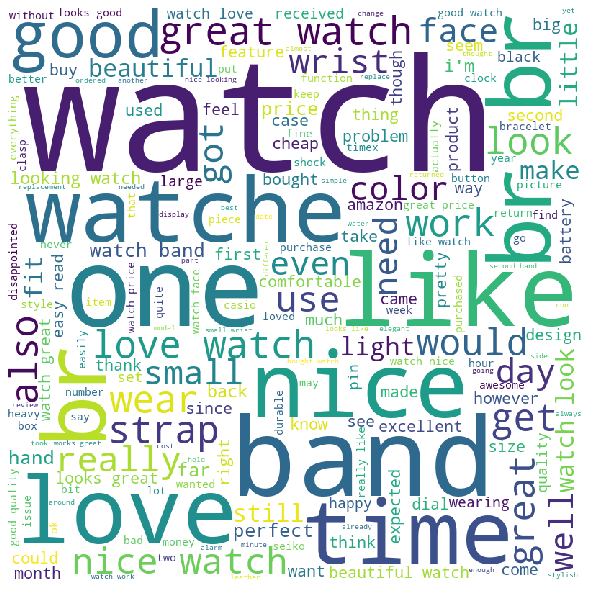

In [39]:
wordcloud1 = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop, min_font_size = 10).generate(comment_words1) 

# plot the WordCloud image                        
pplt.figure(figsize = (8, 8), facecolor = None) 
pplt.imshow(wordcloud1) 
pplt.axis("off") 
pplt.tight_layout(pad = 0) 
  
pplt.show() 

In [40]:
# subset 2
comment_words2 = ''
for val in reviews2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words2 = comment_words2 + words + ' '

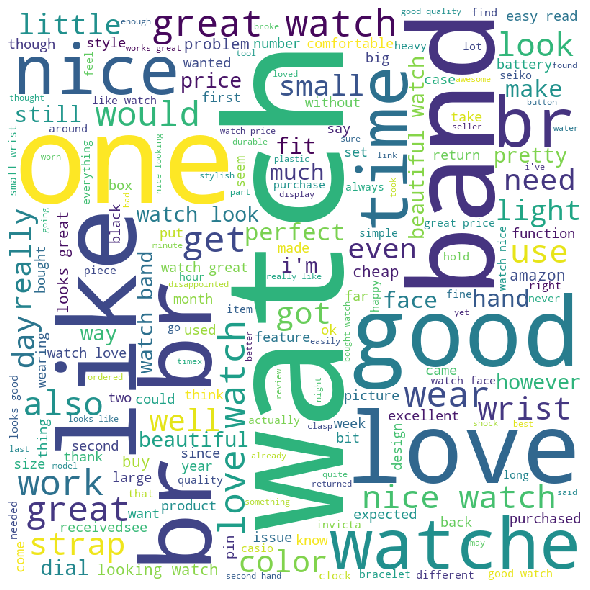

In [41]:
wordcloud2 = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop, min_font_size = 10).generate(comment_words2) 

# plot the WordCloud image                        
pplt.figure(figsize = (8, 8), facecolor = None) 
pplt.imshow(wordcloud2) 
pplt.axis("off") 
pplt.tight_layout(pad = 0) 
  
pplt.show() 

In [42]:
# subset 3
comment_words3 = ''
for val in reviews3: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words3 = comment_words3 + words + ' '

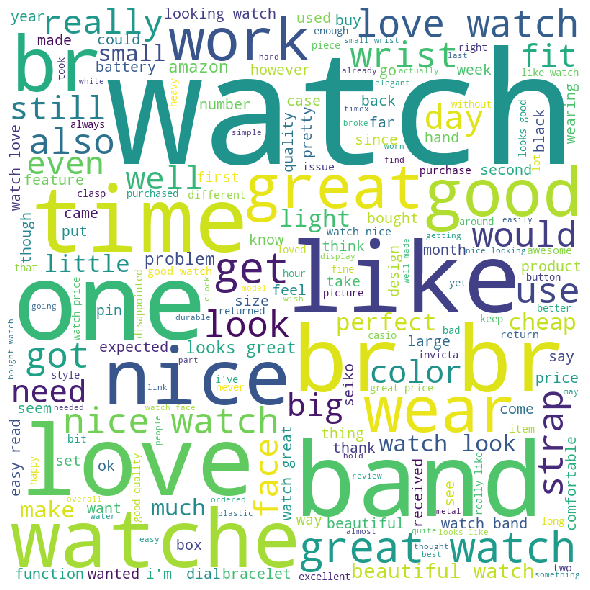

In [43]:
wordcloud3 = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop, min_font_size = 10).generate(comment_words3) 

# plot the WordCloud image                        
pplt.figure(figsize = (8, 8), facecolor = None) 
pplt.imshow(wordcloud3) 
pplt.axis("off") 
pplt.tight_layout(pad = 0) 
  
pplt.show() 

In [44]:
# subset 4
comment_words4 = ''
for val in reviews4: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words4 = comment_words4 + words + ' '

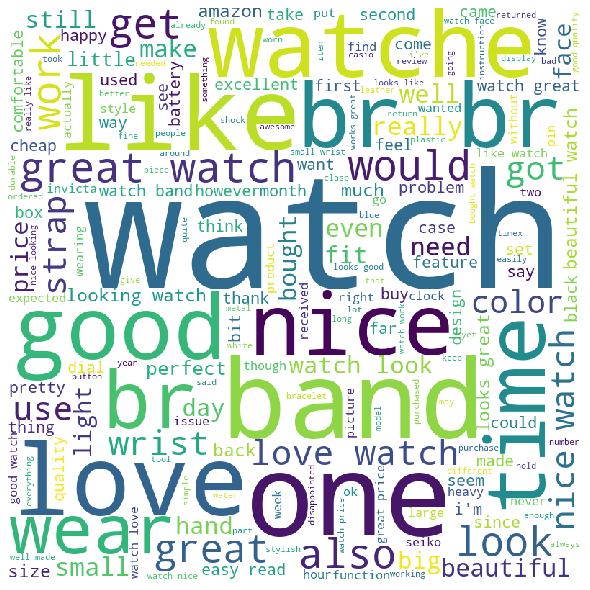

In [45]:
wordcloud4 = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop, min_font_size = 10).generate(comment_words4) 

# plot the WordCloud image                        
pplt.figure(figsize = (8, 8), facecolor = None) 
pplt.imshow(wordcloud4) 
pplt.axis("off") 
pplt.tight_layout(pad = 0) 
  
pplt.show() 

In [46]:
# subset 5
comment_words5 = ''
for val in reviews5: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words5 = comment_words5 + words + ' '

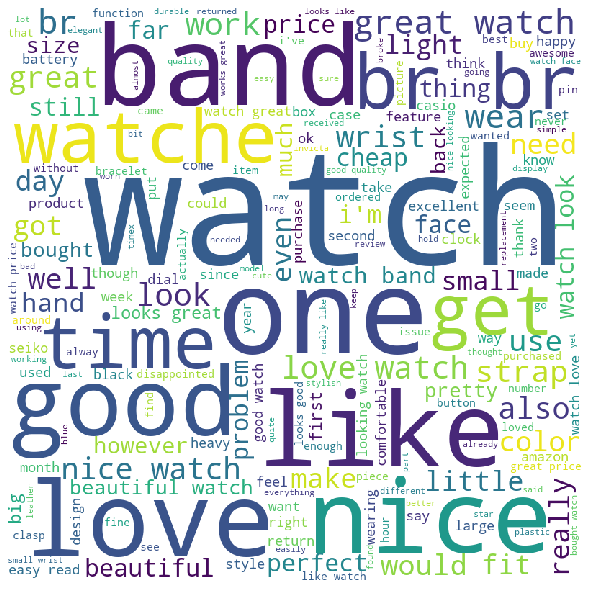

In [47]:
wordcloud5 = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop, min_font_size = 10).generate(comment_words5) 

# plot the WordCloud image                        
pplt.figure(figsize = (8, 8), facecolor = None) 
pplt.imshow(wordcloud5) 
pplt.axis("off") 
pplt.tight_layout(pad = 0) 
  
pplt.show() 

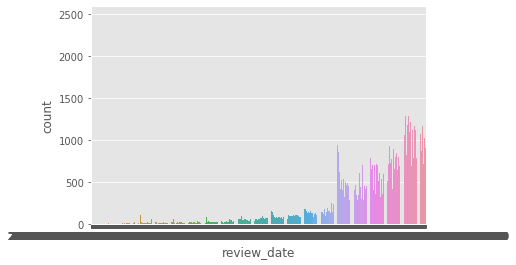

In [48]:
sns.countplot(x='review_date',data = verified)

In [49]:
verified = verified.drop(columns="review_headline")
verified = verified.drop(columns="review_body")
verified= verified.drop(columns="marketplace")
verified= verified.drop(columns="vine")

In [50]:
verified

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,3653882.0,R3O9SGZBVQBV76,B00FALQ1ZC,937001370.0,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5.0,0.0,0.0,Y,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14661224.0,RKH8BNC3L5DLF,B00D3RGO20,484010722.0,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5.0,0.0,0.0,Y,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27324930.0,R2HLE8WKZSU3NL,B00DKYC7TK,361166390.0,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2.0,1.0,1.0,Y,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7211452.0,R31U3UH5AZ42LL,B000EQS1JW,958035625.0,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5.0,0.0,0.0,Y,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12733322.0,R2SV659OUJ945Y,B00A6GFD7S,765328221.0,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4.0,0.0,0.0,Y,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960200,52567751.0,R1KB6VKO3O3WFP,B00005OT9I,2153632.0,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2.0,2.0,2.0,Y,2003-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960201,40971960.0,R1XLXFPI77W3RK,B00005OT91,458246193.0,Timex Men's T44661 Expedition Metal Tech Watch,Watches,4.0,7.0,7.0,Y,2003-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960226,48770245.0,R1GI9H9A6NH047,B00005OT8Z,122254165.0,Timex Ironman Triathlon Digital Heart Rate Mon...,Watches,4.0,12.0,16.0,Y,2002-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960235,43740490.0,R1QR8HYA5KKDUC,B00005RE2T,446758659.0,Kenneth Cole Women's KC4232 Reaction Silver-Wh...,Watches,5.0,9.0,9.0,Y,2002-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
verified['year'], verified['month'] = verified['review_date'].dt.year, verified['review_date'].dt.month

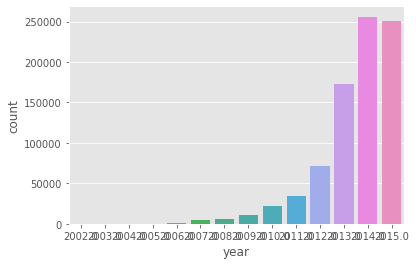

In [52]:
sns.countplot(x='year',data = verified)

In [53]:
verCleaned = verified[verified['year'] < 2015] 
verCleaned.columns

Index(['customer_id', 'review_id', 'product_id', 'product_parent',
       'product_title', 'product_category', 'star_rating', 'helpful_votes',
       'total_votes', 'verified_purchase', 'review_date', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'year', 'month'],
      dtype='object')

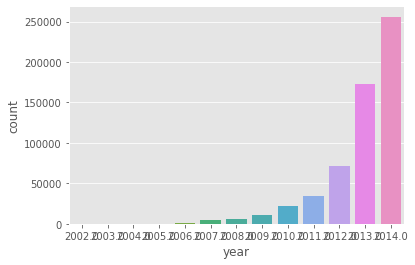

In [54]:
sns.countplot(x='year',data = verCleaned)

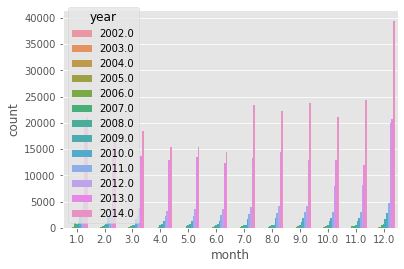

In [55]:
# Monthly sales, yearwise

sns.countplot(x='month',hue='year',data=verCleaned)

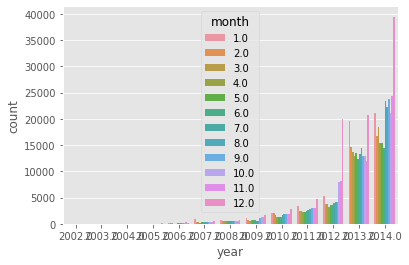

In [56]:
# Yearly sales, monthwise
sns.countplot(x='year',hue='month',data=verCleaned)

In [57]:
test = verCleaned[verCleaned['year'] == 2014] 
train = verCleaned[verCleaned['year'] < 2014] 

In [58]:
# testing
sales_2014 = product_2014.count()
# training
sales_2013 = product_2013.count()
sales_2012 = product_2012.count()
sales_2011 = product_2011.count()
sales_2010 = product_2010.count()
sales_2009 = product_2009.count()
sales_2008 = product_2008.count()
sales_2007 = product_2007.count()
sales_2006 = product_2006.count()
sales_2005 = product_2005.count()
sales_2004 = product_2004.count()
sales_2003 = product_2003.count()
sales_2002 = product_2002.count()

In [59]:
train_data = {'year':[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014],'sales':[sales_2002,sales_2003,sales_2004,sales_2005,sales_2006,sales_2007,
                                                                                                 sales_2008,sales_2009,sales_2010,sales_2011,sales_2012,sales_2013,sales_2014]}
train_data_frame = pd.DataFrame(train_data)
train_data_frame

,year,sales
0,2002,3
1,2003,8
2,2004,39
3,2005,248
4,2006,841
5,2007,3062
6,2008,3806
7,2009,5784
8,2010,9974
9,2011,14696


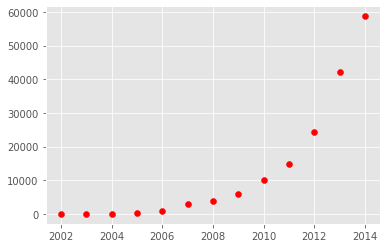

In [60]:
pplt.scatter(train_data_frame['year'],train_data_frame['sales'],c='r')

In [61]:
# Applying market basket analysis for 2014...
# create a subset for sales in 2014
temp1 = verified[verified['year'] == 2014]
subset_2014 = temp1[["review_id","customer_id","product_id","product_title","year","month"]]

In [62]:
transactions = []
for i in range(0,10000):
    transactions.append([str(subset_2014.values[i,j]) for j in range(0,5)])

In [67]:
rules = apriori(transactions,min_support = 0.003, min_confidence = 0.02, min_lift = 3, min_length = 2)

In [68]:
print(list(rules))

[RelationRecord(items=frozenset({'B000T9VK56', 'SE JT6216 21-Piece Watch Repair Kit'}), support=0.0031, ordered_statistics=[OrderedStatistic(items_base=frozenset({'B000T9VK56'}), items_add=frozenset({'SE JT6216 21-Piece Watch Repair Kit'}), confidence=1.0, lift=322.5806451612903), OrderedStatistic(items_base=frozenset({'SE JT6216 21-Piece Watch Repair Kit'}), items_add=frozenset({'B000T9VK56'}), confidence=1.0, lift=322.5806451612903)]), RelationRecord(items=frozenset({'B00L3VDGU6', "Disney's Frozen Elsa & Anna Singing Watch - Let it GO!"}), support=0.0043, ordered_statistics=[OrderedStatistic(items_base=frozenset({'B00L3VDGU6'}), items_add=frozenset({"Disney's Frozen Elsa & Anna Singing Watch - Let it GO!"}), confidence=1.0, lift=232.5581395348837), OrderedStatistic(items_base=frozenset({"Disney's Frozen Elsa & Anna Singing Watch - Let it GO!"}), items_add=frozenset({'B00L3VDGU6'}), confidence=1.0, lift=232.5581395348837)]), RelationRecord(items=frozenset({'2014.0', 'B000T9VK56', 'SE 